In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_excel("Online Retail.xlsx")

In [77]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [79]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [80]:
X = df[['Quantity', 'UnitPrice']]

In [81]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

In [82]:
# columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[2])],remainder='passthrough')

In [83]:
# X_encoded = columnTransformer.fit_transform(X)

In [84]:
# df['Country'].value_counts()

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# # Combine the standardized numerical features with the encoded features
# from scipy.sparse import hstack
# X_scaled = hstack((X_scaled_numerical, X_encoded))

In [87]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

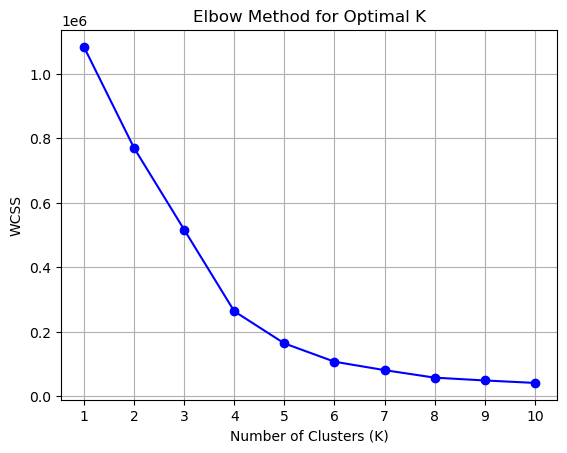

In [88]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [104]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [105]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

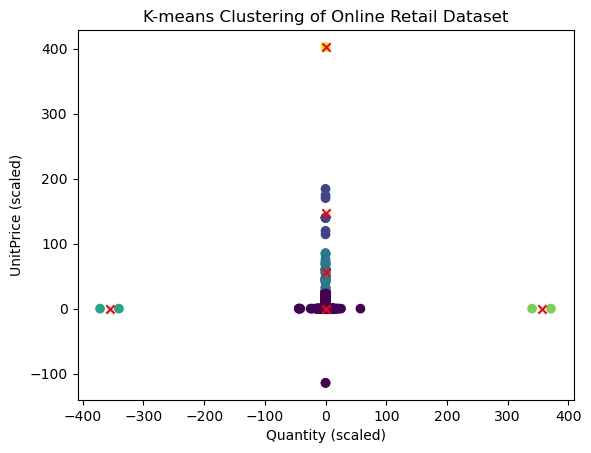

In [106]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.xlabel('Quantity (scaled)')
plt.ylabel('UnitPrice (scaled)')
plt.title('K-means Clustering of Online Retail Dataset')
plt.show()